In [74]:
#load and visualize the data
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVC
#Data Pipline
from sklearn.pipeline import Pipeline

#Data Transform
from sklearn.preprocessing import MinMaxScaler
#from sklearn.impute import SimpleImputer

#Model Selection
from sklearn.model_selection import train_test_split,GridSearchCV

#ML models
from sklearn.linear_model import LogisticRegression,SGDRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.cluster import KMeans

In [75]:
#Load dataset:
df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
df.shape

(768, 9)

In [77]:
#Descriptive statistics:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [79]:
#use Linear Regression (OLS closed form solution):
#LR_model = LinearRegression()


<AxesSubplot:xlabel='Age', ylabel='Count'>

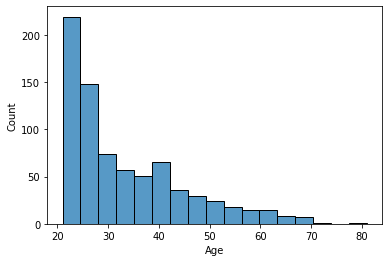

In [81]:
# Data visualizations:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

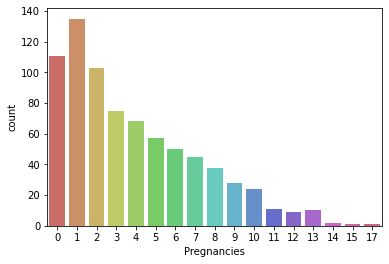

In [82]:
# Data visualizations:
sns.countplot(x='Pregnancies',data=df ,palette='hls')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

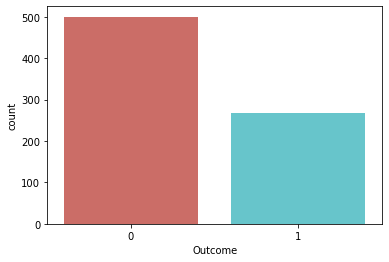

In [83]:
sns.countplot(x='Outcome',data=df , palette='hls')

In [87]:
#check the null values 
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [88]:
#Feature Selection

In [89]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [91]:
#Logistic Regression Pipline

In [92]:
LR_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LogisticRegression()) #estimator
])

In [93]:
#Train the model

In [94]:
LR_pipline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LogisticRegression())])

In [95]:
#prediction

In [96]:
#predict testing data
LR_y_pred = LR_pipline.predict(x_test)

In [97]:
#Model Evaluation

In [98]:
LR_accuracy=accuracy_score(y_test,LR_y_pred)
LR_accuracy

0.7359307359307359

In [99]:
target=['No Diabetes', 'Has Diabetes']
LR_CR=classification_report(y_test,LR_y_pred,target_names=target)
print(LR_CR)

              precision    recall  f1-score   support

 No Diabetes       0.77      0.86      0.81       154
Has Diabetes       0.64      0.48      0.55        77

    accuracy                           0.74       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231



In [100]:
#Decision Trees Pipline

In [101]:
DT_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", tree.DecisionTreeClassifier()) #estimator
])

In [102]:
#Train the model

In [103]:
DT_pipline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', DecisionTreeClassifier())])

In [104]:
#prediction

In [105]:
DT_y_pred=DT_pipline.predict(x_test)

In [106]:
#Model Evaluation

In [107]:
#calculate the accuaracy
DT_accuracy=accuracy_score(y_test,DT_y_pred)
DT_accuracy

0.670995670995671

In [108]:
#Classification report
DT_CR=classification_report(y_test,DT_y_pred,target_names=target)
print(DT_CR)

              precision    recall  f1-score   support

 No Diabetes       0.80      0.68      0.73       154
Has Diabetes       0.50      0.66      0.57        77

    accuracy                           0.67       231
   macro avg       0.65      0.67      0.65       231
weighted avg       0.70      0.67      0.68       231



In [109]:
#Visualize the Tree

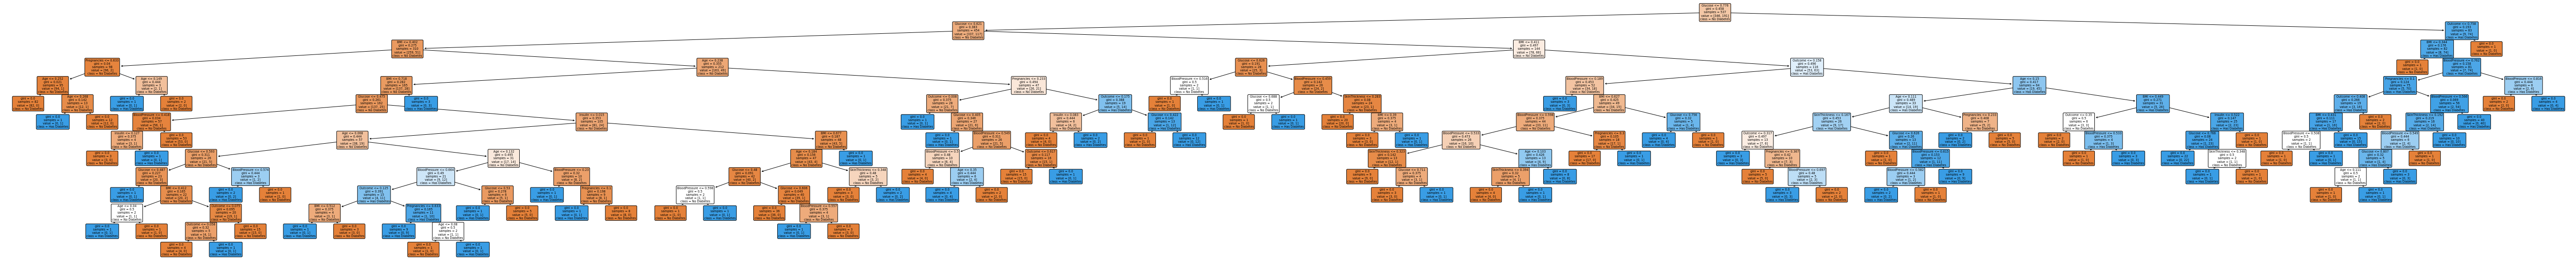

In [110]:
plt.figure(figsize=(98,10))
feature_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age','Outcome']
tree.plot_tree(DT_pipline.named_steps['model'],feature_names=feature_names,class_names=target,filled=True,rounded=True)
plt.show()

In [111]:
#Ensembles
#voting

In [112]:
logs = LogisticRegression()
dt = DecisionTreeClassifier()

In [113]:
from sklearn.ensemble import VotingClassifier
pipV=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", VotingClassifier(
estimators=[('lr', logs),('dt',dt)],
voting='hard')) #estimator
])

In [114]:
#voting_clf.fit(('x_train'), ('y_train'))
array_x=np.array(x_train)
array_y=np.array(y_train)

In [115]:
pipV.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('dt',
                                               DecisionTreeClassifier())]))])

In [116]:
V_y_pred=pipV.predict(x_test)

In [117]:
V_accuracy=accuracy_score(y_test,V_y_pred)
V_accuracy

0.7186147186147186

In [118]:
Knn=KNeighborsClassifier()

In [119]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [120]:
y_pridict=Knn.predict(x_test)

In [121]:
knn_accuracy=accuracy_score(y_test,y_pridict)
knn_accuracy

0.70995670995671

In [131]:
data={'Logistic Regression':[LR_accuracy],'Decision Tree':[DT_accuracy],'Voting Classifier':[V_accuracy],'KNN':[knn_accuracy],'svm':[svc_accuracy]}

In [132]:
result=pd.DataFrame(data)
result.index=['accuracy']
result

,Logistic Regression,Decision Tree,Voting Classifier,KNN,svm
accuracy,0.735931,0.670996,0.718615,0.709957,0.74026


In [124]:
#Feature Selection

In [125]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(df.drop('Outcome', axis=1), df['Outcome']) 

DecisionTreeClassifier(max_depth=5, random_state=42)

In [126]:
for i in zip(df, tree_clf.feature_importances_):
    print(i)

('Pregnancies', 0.011211235875717564)
('Glucose', 0.4907106107791432)
('BloodPressure', 0.04169142045278744)
('SkinThickness', 0.0)
('Insulin', 0.03106604019488539)
('BMI', 0.22051933826971748)
('DiabetesPedigreeFunction', 0.06767919376257207)
('Age', 0.13712216066517693)


In [127]:
svc_pipline= Pipeline([
    ("scaler", MinMaxScaler()), 
    ("SVC", SVC())
])

In [128]:
svc_pipline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVC', SVC())])

In [129]:
svc_y_pred=svc_pipline.predict(x_test)

In [130]:
#calculate the accuaracy
svc_accuracy=accuracy_score(y_test,svc_y_pred)
svc_accuracy

0.7402597402597403